In [1]:
# loop throug Datasets\OHLC data folders .csv files reading them one by one as a pandas data frame

import os
import pandas as pd
import numpy as np


pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
segmen_size = 200
# padding = 5
percentage_of_a_pattern_to_be_considered = 0.75


# set the path to the folder containing the data
path = '../../Datasets/OHLC_data'

#  load Datasets\scraped_blog_tables.csv into a pandas data frame
pattern_labled_df = pd.read_csv('../../Datasets/scraped_blog_tables.csv')
pattern_labled_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,12/19/2019,01/30/2020,IT Services
1,ADS,Broadening top,-1,12/13/2019,01/24/2020,Information Services
2,AVY,Triple bottom,1,12/03/2019,01/27/2020,Packaging and Container
3,CMTL,Dead-cat bounce,-1,01/29/2020,01/29/2020,Telecom. Equipment
4,CSOD,Pipe top,-1,01/13/2020,01/21/2020,E-Commerce
...,...,...,...,...,...,...
9929,SO,Head-and-shoulders top,0,09/05/2024,11/27/2024,Electric Utility (East)
9930,SRDX,Rising wedge,0,10/25/2024,12/05/2024,Medical Supplies
9931,TDOC,"Double Top, Adam and Adam",0,11/25/2024,12/02/2024,Healthcare Information
9932,TER,"Double Bottom, Adam and Eve",0,11/05/2024,11/20/2024,Semiconductor Cap Equip.


In [2]:
# convert the date columns to datetime
pattern_labled_df['Start'] = pd.to_datetime(pattern_labled_df['Start'])
pattern_labled_df['End'] = pd.to_datetime(pattern_labled_df['End'])
# convert segment size to a timedelta
segmen_size_date = pd.to_timedelta(segmen_size, unit='D')

# only have the the rows wich have minimum 100 days from Start to End
pattern_labled_df = pattern_labled_df[pattern_labled_df['End'] - pattern_labled_df['Start'] <= segmen_size_date]

# only keep the rows with the patterns we are interested in
pattern_labled_df = pattern_labled_df[pattern_labled_df['Chart Pattern'].isin(pattern_encoding.keys())]
pattern_labled_df


,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,2019-12-19,2020-01-30,IT Services
14,TPX,"Double Bottom, Eve and Adam",1,2020-01-06,2020-01-27,Furn/Home Furnishings
20,BBW,"Flag, high and tight",1,2019-12-12,2020-01-23,Retail (Special Lines)
22,CIEN,"Triangle, symmetrical",1,2019-12-13,2020-01-23,Telecom. Equipment
23,EVH,"Flag, high and tight",1,2019-11-27,2020-01-17,Healthcare Information
...,...,...,...,...,...,...
9919,OXY,Head-and-shoulders top,0,2024-11-06,2024-11-22,Petroleum (Producing)
9921,ON,"Double Top, Adam and Adam",0,2024-11-25,2024-12-02,Semiconductor
9923,PETS,"Double Bottom, Eve and Adam",0,2024-11-19,2024-12-02,Medical Services
9929,SO,Head-and-shoulders top,0,2024-09-05,2024-11-27,Electric Utility (East)


In [3]:
labled_date_segment_for_this_symbol = (pattern_labled_df[pattern_labled_df['Symbol'] == "BBW"]).copy()
# order labled_date_segment_for_this_symbol by Start date
labled_date_segment_for_this_symbol = labled_date_segment_for_this_symbol.sort_values(by='Start')
print(labled_date_segment_for_this_symbol)
labled_date_segment_for_this_symbol.reset_index(drop=True, inplace=True)    
print(labled_date_segment_for_this_symbol)

# create a touple of the index of the rows of the labled_date_segment_for_this_symbol and shuffle it
index_touple = list(range(len(labled_date_segment_for_this_symbol)))
np.random.shuffle(index_touple)
index_touple

     Symbol                 Chart Pattern  BullishBearish      Start  \
20      BBW          Flag, high and tight               1 2019-12-12   
305     BBW          Flag, high and tight               1 2020-04-03   
549     BBW     Head-and-shoulders bottom               1 2020-05-04   
1506    BBW          Flag, high and tight               1 2021-01-11   
1637    BBW          Flag, high and tight               1 2021-03-29   
5068    BBW          Flag, high and tight               0 2022-09-30   
5119    BBW         Triangle, symmetrical               0 2022-12-14   
8832    BBW  Double Bottom, Adam and Adam               0 2024-07-09   
9635    BBW        Head-and-shoulders top               0 2024-10-31   

            End                Industry  
20   2020-01-23  Retail (Special Lines)  
305  2020-04-23  Retail (Special Lines)  
549  2020-06-02  Retail (Special Lines)  
1506 2021-03-10  Retail (Special Lines)  
1637 2021-05-27  Retail (Special Lines)  
5068 2022-12-08  Retail (Sp

[3, 2, 8, 6, 0, 4, 7, 5, 1]

In [4]:
ohcl_segments_df = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])
# and give this 2 level indexes, level 0 called Instance and level 1 called Time
ohcl_segments_df.index = pd.MultiIndex.from_tuples([], names=['Instance', 'Time'])
ohcl_segments_df

,,Open,High,Low,Close
Instance,Time,,,,


In [5]:
# OHCL_symbol_df ["Date"] = pd.to_datetime(OHCL_symbol_df["Date"])
# OHCL_symbol_df

In [6]:
# # pick_date = ("2020-01-02").to_datetime() 
# pick_date = pd.to_datetime("2020-01-02")
# pick_date = pd.Timestamp(pick_date, tz='UTC')

# row = OHCL_symbol_df[OHCL_symbol_df['Date'] == pick_date]
# row

In [7]:


# # Append the actual values if data exists
# rows.append(((instance, time), row[['Open', 'High', 'Low', 'Close']].values))
# print(row[['Open', 'High', 'Low', 'Close']].values)
# print  (type(row[['Open', 'High', 'Low', 'Close']].values))

# # Append a 2D array of zeros
# rows.append(((instance, time), np.array([[0, 0, 0, 0]])))
# print(np.array([[0, 0, 0, 0]]))
# print  (type(np.array([[0, 0, 0, 0]])))

In [8]:
lable_df = pd.DataFrame(columns=['Pattern', 'Center', 'Width'])
# and give this 2 level indexes, level 0 called Instance and level 1 called Pattern_Id
lable_df.index = pd.MultiIndex.from_tuples([], names=['Instance', 'Pattern_Id'])

def add_to_lables( pattern, center, width ,instance, pattern_idx):
    global lable_df
    new_row = { 
                'Pattern': pattern,  # Example pattern
                'Center': center ,  # Example start date
                'Width': width # Example end date
            }
    # Define the MultiIndex for the new row
    new_index = pd.MultiIndex.from_tuples([(instance, pattern_idx)], names=['Instance', 'Pattern_Id'])

    # Create a DataFrame for the new row and append it to the original DataFrame
    new_df = pd.DataFrame([new_row], index=new_index, columns=lable_df.columns)
    lable_df = pd.concat([lable_df, new_df])

In [9]:
lable_df

,,Pattern,Center,Width
Instance,Pattern_Id,,,


In [11]:
instance = 0

# loop through the files in the folder
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        print(filename)
        OHCL_symbol_df = pd.read_csv(path + '/' + filename)
        # print(df.head())
        
        
        
        # get the file name without the extension
        name = os.path.splitext(filename)[0]
        # get the rows of pattern_labled_df where Symbol == name
        labled_date_segment_for_this_symbol = (pattern_labled_df[pattern_labled_df['Symbol'] == name]).copy()
        # order labled_date_segment_for_this_symbol by Start date
        labled_date_segment_for_this_symbol = labled_date_segment_for_this_symbol.sort_values(by='Start')
        labled_date_segment_for_this_symbol.reset_index(drop=True, inplace=True)  
        
        
        # instead of incrementing the index, draw a index randomly from a pool, then instead of checking the forward for fitting pattern look eaither forward or bck word first at random then the other 
        
        # create a touple of the index of the rows of the labled_date_segment_for_this_symbol and shuffle it
        index_touple = list(range(len(labled_date_segment_for_this_symbol)))
        np.random.shuffle(index_touple)
        
        
        while index_touple != []:
            print("index_touple", index_touple)
            index = index_touple.pop()
            pattern_idx  = 1
            patterns_for_this_instance = []
            
            
            row = labled_date_segment_for_this_symbol.iloc[index]
            print('popped index', index)
            
            # get the start and end date of the segment
            start_date = row['Start'] 
            end_date = row['End'] 
            # get the pattern
            pattern = row['Chart Pattern']
            # get the encoding of the pattern
            pattern_encoding_value = pattern_encoding[pattern]
            
            # add_to_lables( pattern_encoding_value, row['Start'] , row['End'] , instance, pattern_idx)
            patterns_for_this_instance.append([pattern_encoding_value, start_date, end_date])
            print("pattern_idx", pattern_idx , "pattern_encoding_value", pattern_encoding_value , "start_date", start_date, "end_date", end_date)
                        
            pattern_length = end_date - start_date
            extra_days = segmen_size_date - pattern_length
            
            # randomly pick +1 or -1
            direction = np.random.choice([-1, 1])
            
            pattern_to_right_exists = True
            pattern_to_left_exists = True
            
            while extra_days and index_touple != [] and (pattern_to_right_exists or pattern_to_left_exists):
                print('direction', direction)
                if direction == 1:
                    # get the next index that is next bigger than the current index
                    # get the list of values that are biggr than the current index from index_touple
                    bigger = [i for i in index_touple if i > index]
                    print("bigger list", bigger)
                    if bigger:
                        new_large_index = min(bigger)
                        print("new_large_index", new_large_index)
                        new_large_row = labled_date_segment_for_this_symbol.iloc[new_large_index]
                        new_large_start_date = new_large_row['Start'] 
                        new_large_end_date = new_large_row['End'] 
                        
                        max_end_now = end_date + extra_days
                        right_margin_for_new_pattern = min(new_large_end_date, max_end_now)
                        
                        
                        # if the new pattern can fit in the segment
                        if new_large_start_date <= max_end_now :
                            portion_of_new_pattern = (right_margin_for_new_pattern- new_large_start_date)/ (new_large_end_date - new_large_start_date)
                            print("portion_of_new_pattern", portion_of_new_pattern)
                            if portion_of_new_pattern >= percentage_of_a_pattern_to_be_considered:
                                # get the pattern
                                new_pattern = new_large_row['Chart Pattern']
                                # get the encoding of the pattern
                                new_pattern_encoding_value = pattern_encoding[new_pattern] 
                                pattern_idx += 1
                                # add_to_lables(new_pattern_encoding_value, new_large_start_date, right_margin_for_new_pattern, instance, pattern_idx)
                                patterns_for_this_instance.append([new_pattern_encoding_value, new_large_start_date, right_margin_for_new_pattern])
                                print("pattern_idx", pattern_idx , "new_pattern_encoding_value", new_pattern_encoding_value , "new_large_start_date", new_large_start_date, "right_margin_for_new_pattern", right_margin_for_new_pattern)
                                end_date = right_margin_for_new_pattern
                                extra_days = segmen_size_date - (end_date - start_date)
                                direction = -direction
                                index_touple.remove(new_large_index)
                                continue
                                
                    
                    # if no pattern to the right detected and the loop didnt get continued   
                    pattern_to_right_exists = False
                    direction = -direction
                    
                    
                elif direction == -1:
                    # get the next index that is next smaller than the current index
                    # get the list of values that are smaller than the current index from index_touple
                    smaller = [i for i in index_touple if i < index]
                    print("smaller list", smaller)
                    if smaller:
                        new_small_index = max(smaller)
                        print("new_small_index", new_small_index)
                        new_small_row = labled_date_segment_for_this_symbol.iloc[new_small_index]
                        new_small_start_date = new_small_row['Start'] 
                        new_small_end_date = new_small_row['End'] 
                        
                        min_start_now = start_date - extra_days
                        left_margin_for_new_pattern = max(new_small_start_date, min_start_now)
                        
                        # if the new pattern can fit in the segment
                        if new_small_end_date >= min_start_now :
                            portion_of_new_pattern = (new_small_end_date-left_margin_for_new_pattern) / (new_small_end_date - new_small_start_date)
                            print("portion_of_new_pattern", portion_of_new_pattern)
                            if portion_of_new_pattern >= percentage_of_a_pattern_to_be_considered:
                                # get the pattern
                                new_pattern = new_small_row['Chart Pattern']
                                # get the encoding of the pattern
                                new_pattern_encoding_value = pattern_encoding[new_pattern] 
                                pattern_idx += 1
                                # add_to_lables(new_pattern_encoding_value, left_margin_for_new_pattern, new_small_end_date, instance, pattern_idx)
                                patterns_for_this_instance.append([new_pattern_encoding_value, left_margin_for_new_pattern, new_small_end_date])
                                print("pattern_idx", pattern_idx , "new_pattern_encoding_value", new_pattern_encoding_value , "left_margin_for_new_pattern", left_margin_for_new_pattern, "new_small_end_date", new_small_end_date)
                                start_date = left_margin_for_new_pattern
                                extra_days = segmen_size_date - (end_date - start_date)
                                direction = -direction
                                index_touple.remove(new_small_index)
                                continue
                                
                    
                    # if no pattern to the left detected and the loop didnt get continued   
                    pattern_to_left_exists = False
                    direction = -direction
            
            
            print("extra_days", extra_days)
            if extra_days != pd.Timedelta('0 days'):
                # generate a random number between 0 and extra_days
                random_number = np.random.randint(0, extra_days.days)
            else:
                random_number = 0
            
            # select a random date segmont that will contain the pattern
            segment_start_date = start_date - pd.to_timedelta(random_number, unit='D')
            segment_end_date = segment_start_date + segmen_size_date
            
            print ("segment_start_date", segment_start_date, "segment_end_date", segment_end_date)
            
            # convert to datetime
            segment_start_date = pd.Timestamp(segment_start_date, tz='UTC')
            segment_end_date = pd.Timestamp(segment_end_date, tz='UTC')

            # convert OHCL_symbol_df['Date'] to datetime if it's not already
            OHCL_symbol_df['Date'] = pd.to_datetime(OHCL_symbol_df['Date'])

            # check if 'Date' is already timezone-aware
            if OHCL_symbol_df['Date'].dt.tz is None:
                OHCL_symbol_df['Date'] = OHCL_symbol_df['Date'].dt.tz_localize('UTC')
            else:
                OHCL_symbol_df['Date'] = OHCL_symbol_df['Date'].dt.tz_convert('UTC')

            # get the rows of OHCL_symbol_df where Date >= start_date and Date <= end_date
            date_segment = OHCL_symbol_df[(OHCL_symbol_df['Date'] >= segment_start_date) & (OHCL_symbol_df['Date'] <= segment_end_date)]
            
            # get the minimum and maximum date of the segment date_segment
            min_date = date_segment['Date'].min()
            max_date = date_segment['Date'].max()
            
            print ("min_date", min_date, "max_date", max_date)
            print ("segment_start_date", segment_start_date, "segment_end_date", segment_end_date)
            
            # rows = []
            # time = 0
            # for i, row in date_segment.iterrows():
            #     rows.append(((instance, time), row[['Open', 'High', 'Low', 'Close']].values))
            #     print("in loooooooop",row[['Open', 'High', 'Low', 'Close']].values)
            #     time += 1
            
            pick_date = segment_start_date
            time = 0
            rows = []
            while pick_date < segment_end_date:
                # Filter the row for the current pick_date
                row = OHCL_symbol_df[OHCL_symbol_df['Date'] == pick_date]
                
                if not row.empty:
                    # Append the actual values if data exists
                    rows.append(((instance, time), (row[['Open', 'High', 'Low', 'Close']].values)[0]))
                else:
                    # Append a 2D array of zeros
                    rows.append(((instance, time), np.array([0, 0, 0, 0])))
                    print("no data for", pick_date)
                
                # Increment time and pick_date
                time += 1
                pick_date += pd.Timedelta('1 days')

            
            print("rows", rows)

            # Convert rows to DataFrame and concatenate
            new_data = pd.DataFrame.from_dict(dict(rows), orient='index', columns=['Open', 'High', 'Low', 'Close'])
            new_data.index = pd.MultiIndex.from_tuples(new_data.index, names=['Instance', 'Time'])


            ohcl_segments_df = pd.concat([ohcl_segments_df, new_data])
            
            
            for pattern in patterns_for_this_instance:
                pattern_encoding_value = pattern[0]
                start_date = pattern[1]
                end_date = pattern[2]         
                
                # convert to date time
                start_date = pd.Timestamp(start_date, tz='UTC')
                end_date = pd.Timestamp(end_date, tz='UTC')
                   
                
                pattern_start_cordinate = (start_date - segment_start_date) / segmen_size_date
                pattern_end_cordinate = (end_date - segment_start_date) / segmen_size_date
                pattern_center_cordinate = (pattern_start_cordinate + pattern_end_cordinate) / 2
                pattern_width = pattern_end_cordinate - pattern_start_cordinate
                
                print("pattern_encoding_value", pattern_encoding_value, "pattern_start_cordinate", pattern_start_cordinate, "pattern_end_cordinate", pattern_end_cordinate, "pattern_center_cordinate", pattern_center_cordinate, "pattern_width", pattern_width)
                
                add_to_lables(pattern_encoding_value, pattern_center_cordinate, pattern_width, instance, pattern_idx)
            
            
            
            
            print("instance", instance)
            print ("ohcl_segments_df", ohcl_segments_df)
            print("lable_df", lable_df)
            
            instance += 1

        
        


A.csv
index_touple [0, 2, 1]
popped index 1
pattern_idx 1 pattern_encoding_value 5 start_date 2023-03-02 00:00:00 end_date 2023-04-10 00:00:00
direction -1
smaller list [0]
new_small_index 0
portion_of_new_pattern 1.0
pattern_idx 2 new_pattern_encoding_value 1 left_margin_for_new_pattern 2023-01-26 00:00:00 new_small_end_date 2023-02-14 00:00:00
direction 1
bigger list [2]
new_large_index 2
portion_of_new_pattern 1.0
pattern_idx 3 new_pattern_encoding_value 4 new_large_start_date 2023-06-28 00:00:00 right_margin_for_new_pattern 2023-07-06 00:00:00
extra_days 39 days 00:00:00
segment_start_date 2023-01-08 00:00:00 segment_end_date 2023-07-27 00:00:00
min_date 2023-01-09 00:00:00+00:00 max_date 2023-07-27 00:00:00+00:00
segment_start_date 2023-01-08 00:00:00+00:00 segment_end_date 2023-07-27 00:00:00+00:00
no data for 2023-01-08 00:00:00+00:00
no data for 2023-01-14 00:00:00+00:00
no data for 2023-01-15 00:00:00+00:00
no data for 2023-01-16 00:00:00+00:00
no data for 2023-01-21 00:00:00+

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (200,) + inhomogeneous part.

In [ ]:
ohcl_segments_df

Open          High           Low         Close
Instance Time                                                        
0        0       156.970001    157.660004    155.190002    156.229996
         1       155.750000    156.960007    154.809998    155.690002
         2       154.500000    155.520004    150.880005    151.740005
         3       151.610001    153.460007    150.210007    152.080002
         4       153.309998    156.289993    151.720001    155.449997
...                     ...           ...           ...           ...
1834     133   12675.040039  12736.190430  12600.780273  12720.580078
         134   12538.799805  12720.440430  12525.769531  12657.549805
         135   12703.719727  12855.150391  12597.750000  12644.459961
         136   12557.490234  12582.910156  12438.860352  12493.929688
         137   12793.440430  12861.440430  12698.610352  12854.799805

[243845 rows x 4 columns]

In [ ]:
#  get index 69 of ohcl_segments_df
ohcl_segments_df.loc[(15)]

,Open,High,Low,Close
Time,,,,
0,108.739998,109.489998,107.199997,109.300003
1,108.830002,109.500000,108.129997,108.690002
2,108.480003,109.620003,108.199997,109.489998
3,108.730003,109.919998,108.550003,109.260002
4,108.599998,109.400002,108.080002,108.889999
...,...,...,...,...
134,111.269997,113.889999,111.190002,113.510002
135,113.500000,114.279999,113.059998,113.389999
136,113.209999,113.580002,111.190002,111.510002


In [ ]:
lable_df

Pattern  Center  Width
Instance Pattern_Id                       
0        3                4  0.7850  0.040
         3                5  0.2725  0.195
         3                1  0.0475  0.095
1        2                3  0.8900  0.160
         2                3  0.1300  0.210
...                     ...     ...    ...
1833     3                0  0.3775  0.035
         3                4  0.5450  0.030
         3                5  0.8850  0.060
1834     2                0  0.0750  0.040
         2                5  0.5800  0.060

[2858 rows x 3 columns]

segmen_size 200
Counter({1: 1064, 2: 572, 3: 157, 4: 33, 5: 7, 6: 2})


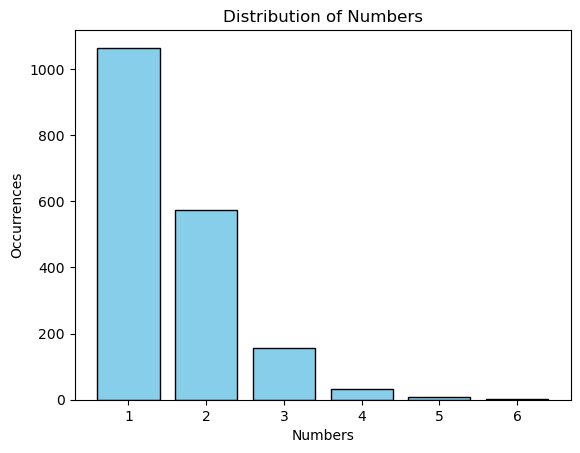

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# get the number of level 1 indexes in a single level 0 index from highest number to lowest
pattern_count_in_a_instance = lable_df.index.get_level_values(0).value_counts()
# convert pattern_count_in_a_instance to a value list
pattern_count_in_a_instance = pattern_count_in_a_instance.values


# Count the occurrences of each number
number_counts = Counter(pattern_count_in_a_instance)

print("segmen_size", segmen_size)
print(number_counts)

# Prepare data for plotting
labels = list(number_counts.keys())
counts = list(number_counts.values())

# Create the bar plot
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Numbers')
plt.ylabel('Occurrences')
plt.title('Distribution of Numbers')
plt.xticks(labels)
plt.show()

segmen_size 100
{1: 1829, 2: 411, 3: 52, 4: 4}


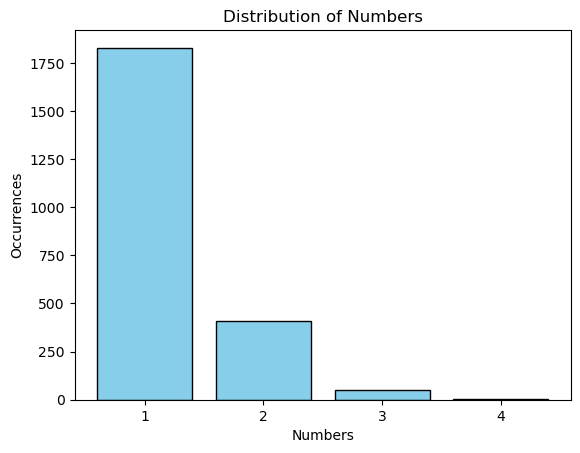

In [ ]:
number_counts= {1: 1829, 2: 411, 3: 52, 4: 4}


print("segmen_size", 100)
print(number_counts)

# Prepare data for plotting
labels = list(number_counts.keys())
counts = list(number_counts.values())

# Create the bar plot
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Numbers')
plt.ylabel('Occurrences')
plt.title('Distribution of Numbers')
plt.xticks(labels)
plt.show()

KeyError: 'Start'

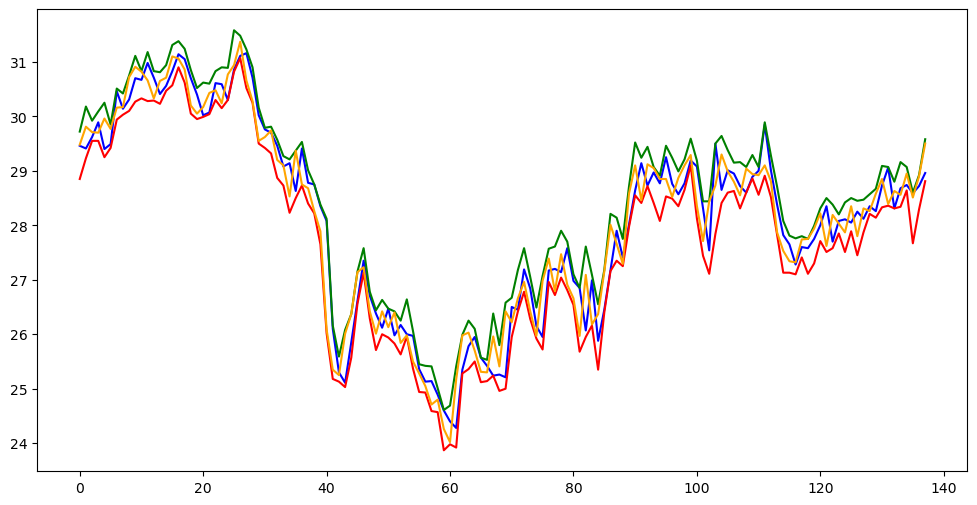

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Random seed for reproducibility
random.seed(42)

# Randomly pick 5 unique instances
instances = ohcl_segments_df.index.get_level_values('Instance').unique()
selected_instances = random.sample(list(instances), 5)

# Iterate through each selected instance
for instance in selected_instances:
    # Get OHCL data for the instance
    ohcl_data = ohcl_segments_df.loc[instance]

    # Get patterns for the instance
    pattern_data = lable_df.loc[instance]

    # Plot OHCL chart
    plt.figure(figsize=(12, 6))
    plt.plot(ohcl_data.index, ohcl_data['Open'], label='Open', color='blue')
    plt.plot(ohcl_data.index, ohcl_data['High'], label='High', color='green')
    plt.plot(ohcl_data.index, ohcl_data['Low'], label='Low', color='red')
    plt.plot(ohcl_data.index, ohcl_data['Close'], label='Close', color='orange')

    # Highlight patterns
    for _, row in pattern_data.iterrows():
        start_date = row['Start']
        end_date = row['End']
        plt.axvspan(start_date, end_date, color='yellow', alpha=0.3, label='Pattern' if _ == 0 else None)

    # Customize plot
    plt.title(f'OHCL Chart with Patterns for Instance {instance}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()
